# <a id='toc1_'></a>[Проект: Принятие решений в бизнесе](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Проект: Принятие решений в бизнесе](#toc1_)    
  - [Описание проекта](#toc1_1_)    
    - [План действий](#toc1_1_1_)    
  - [Часть 1. Приоритизация гипотез.](#toc1_2_)    
      - [Задачи](#toc1_2_1_1_)    
    - [Описание данных](#toc1_2_2_)    
    - [Фреймворк ICE](#toc1_2_3_)    
    - [Фреймворк RICE](#toc1_2_4_)    
    - [Выводы](#toc1_2_5_)    
  - [Часть 2. Анализ A/B-теста](#toc1_3_)    
      - [Задачи](#toc1_3_1_1_)    
    - [Загрузка и описание данных](#toc1_3_2_)    
      - [Описание данных](#toc1_3_2_1_)    
      - [Загрузка и анализ данных](#toc1_3_2_2_)    
    - [Анализ A/B-теста](#toc1_3_3_)    
      - [График кумулятивной выручки по группам](#toc1_3_3_1_)    
      - [График кумулятивного среднего чека по группам](#toc1_3_3_2_)    
      - [График относительного изменения кумулятивного среднего чека группы B к группе A](#toc1_3_3_3_)    
      - [График кумулятивного среднего количества заказов на посетителя по группам](#toc1_3_3_4_)    
      - [График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#toc1_3_3_5_)    
      - [Гочечный график количества заказов по пользователям](#toc1_3_3_6_)    
      - [95-й и 99-й перцентили количества заказов на пользователя](#toc1_3_3_7_)    
      - [Точечный график стоимостей заказов](#toc1_3_3_8_)    
      - [95-й и 99-й перцентили стоимости заказов](#toc1_3_3_9_)    
      - [Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#toc1_3_3_10_)    
      - [Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#toc1_3_3_11_)    
      - [Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#toc1_3_3_12_)    
      - [Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#toc1_3_3_13_)    
      - [Решение по результатам теста](#toc1_3_3_14_)    
    - [Вывод](#toc1_3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Описание проекта](#toc0_)
Для крупного интернет-магазина вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.  

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать  результаты.

### <a id='toc1_1_1_'></a>[План действий](#toc0_)

* В первой части проекта проведем приоритизацию гипотез с помощью фреймворков ICE и RICE.

* Во второй части проекта проведем A/B тест и оценим результаты. Построим графики, проверим выборки на аномалии. Посчитаем статистическую значимость различий в среднем количестве заказов и среднем чеке на сырых и очищенных от аномалий данных.  
Примем решение, продолжать ли тест и сделаем выводы.

In [1]:
# Загрузка библиотек

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 0)

## <a id='toc1_2_'></a>[Часть 1. Приоритизация гипотез.](#toc0_)


В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

#### <a id='toc1_2_1_1_'></a>[Задачи](#toc0_)

1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
3. Рассмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE.

### <a id='toc1_2_2_'></a>[Описание данных](#toc0_)


Файл /datasets/hypothesis.csv

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [2]:
# загрузка файла с гипотезами

try:
    df_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except FileNotFoundError:
    try:
        df_hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    except FileNotFoundError as e:
        print("Файл не найден")

In [3]:
display(df_hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### <a id='toc1_2_3_'></a>[Фреймворк ICE](#toc0_)

ICE рассчитывается по формуле:  
* ICE = (`Impact` * `Confidence`) / `Efforts`

In [4]:
# рассчитаем ICE
df_hypothesis['ICE'] = round((df_hypothesis['Impact'] * df_hypothesis['Confidence']) / df_hypothesis['Efforts'],2)

In [5]:
display(df_hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### <a id='toc1_2_4_'></a>[Фреймворк RICE](#toc0_)

RICE рассчитывается по формуле:  
* RICE = (`Reach` * `Impact` * `Confidence`) / `Efforts`

In [6]:
# рассчитаем RICE
df_hypothesis['RICE'] = (df_hypothesis['Reach'] * df_hypothesis['Impact'] * df_hypothesis['Confidence']) / df_hypothesis['Efforts']

In [7]:
cm = sns.light_palette("#83d487", as_cmap=True)

df_hypothesis.style.background_gradient(cmap=cm).format('{:.2f}', subset=['ICE','RICE'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


### <a id='toc1_2_5_'></a>[Выводы](#toc0_)


ICE отличается от RICE на параметр `Reach`, который отражает долю пользователей, которую затронут изменения, и измеряется от 0 (охват гипотезы никого из пользователей не затронет) до 10 (гипотеза охватит хотя бы половину пользователей).

По результатам ICE приоритет получают гипотезы **№№ 8, 0, 7**.  

После расчета RICE гипотезы **№№ 7, 2, 0** получают более высокий приоритет и
могут быть рекомендованы для тестирования в первую очередь.

Гипотеза **№8** получила низкий бал `Reach` и опускается на 5-ое место по приоритету рассмотрения.


---



## <a id='toc1_3_'></a>[Часть 2. Анализ A/B-теста](#toc0_)


По итогам A/B-теста были получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  

#### <a id='toc1_3_1_1_'></a>[Задачи](#toc0_)

Проанализируем A/B-тест:  

1. Построим график кумулятивной выручки по группам.
2. Построим график кумулятивного среднего чека по группам.
3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
4. Построим график кумулятивного среднего количества заказов на посетителя по группам.
5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
6. Построим точечный график количества заказов по пользователям.
7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
8. Построим точечный график стоимостей заказов. 
9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
14. Примем решение по результатам теста и объясним его.

### <a id='toc1_3_2_'></a>[Загрузка и описание данных](#toc0_)


#### <a id='toc1_3_2_1_'></a>[Описание данных](#toc0_)

1. Файл /datasets/orders.csv

* `transactionId` — идентификатор заказа;  
* `visitorId` — идентификатор пользователя, совершившего заказ;  
* `date` — дата, когда был совершён заказ;  
* `revenue` — выручка заказа;  
* `group` — группа A/B-теста, в которую попал заказ.  

<br/>

2. Файл /datasets/visitors.csv

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

#### <a id='toc1_3_2_2_'></a>[Загрузка и анализ данных](#toc0_)

In [8]:
# загрузка файла с заказами

try:
    df_orders = pd.read_csv('/datasets/orders.csv')
except FileNotFoundError:
    try:
        df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    except FileNotFoundError as e:
        print("Файл 'orders' не найден")

In [9]:
# загрузка файла с визитами

try:
    df_visitors = pd.read_csv('/datasets/visitors.csv')
except FileNotFoundError:
    try:
        df_visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
    except FileNotFoundError as e:
        print("Файл 'visitors' не найден")

In [10]:
# Напишем функцию обзора датафрейма
def df_info (df):
  print('Первые 5 строк:\n')
  display(df.head())
  print('-'*60)

  print('Общая информация:\n')
  df.info()
  print('-'*60)

  print('Количество дубликатов:\n')
  print(df.duplicated().sum())
  print('-'*60)

  print('Количество пропусков:\n')
  print(df.isnull().sum().sort_values(ascending=False))
  print('-'*60)


In [11]:
# Посмотрим на данные из таблицы заказов
df_info(df_orders)

Первые 5 строк:



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


------------------------------------------------------------
Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
------------------------------------------------------------
Количество дубликатов:

0
------------------------------------------------------------
Количество пропусков:

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
------------------------------------------------------------


In [12]:
# Посмотрим на данные из таблицы посетителей
df_info(df_visitors)

Первые 5 строк:



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


------------------------------------------------------------
Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
------------------------------------------------------------
Количество дубликатов:

0
------------------------------------------------------------
Количество пропусков:

date        0
group       0
visitors    0
dtype: int64
------------------------------------------------------------


In [13]:
# Проверим распределение по группам
print('Распределение заказов по группам:\n',df_orders.group.value_counts())
print('Распределение записей количества посетителей по группам:\n',df_visitors.group.value_counts())

Распределение заказов по группам:
 B    640
A    557
Name: group, dtype: int64
Распределение записей количества посетителей по группам:
 A    31
B    31
Name: group, dtype: int64


In [14]:
# Проверим количество уникальных пользователей в таблице c заказами
print('Количество уникальных пользователей в группе "А" :', df_orders[df_orders['group'] =='A']['visitorId'].nunique())
print('Количество уникальных пользователей в группе "B" :', df_orders[df_orders['group'] =='B']['visitorId'].nunique())
print('Всего уникальных пользователей в обеих группах :', df_orders['visitorId'].nunique())


Количество уникальных пользователей в группе "А" : 503
Количество уникальных пользователей в группе "B" : 586
Всего уникальных пользователей в обеих группах : 1031


In [15]:
# Проверим, нет ли пересечения пользователей в группах
df_unique_group_a_visitors = df_orders[df_orders['group'] =='A']['visitorId'].values
df_unique_group_b_visitors = df_orders[df_orders['group'] =='B']['visitorId'].values
common_visitors = np.intersect1d(df_unique_group_a_visitors, df_unique_group_b_visitors)
print('Количество пользователей, попавших в обе группы:', len(common_visitors))

Количество пользователей, попавших в обе группы: 58


In [16]:
# Создадим отдельный датафрейм без дублированных пользователей

df_orders_clear = df_orders.copy()
df_orders_clear = df_orders_clear[~df_orders_clear['visitorId'].isin(common_visitors)]

print('Количество уникальных пользователей в группе "А" :', df_orders_clear[df_orders_clear['group'] =='A']['visitorId'].nunique())
print('Количество уникальных пользователей в группе "B" :', df_orders_clear[df_orders_clear['group'] =='B']['visitorId'].nunique())
print('Всего уникальных пользователей в обеих группах :', df_orders_clear['visitorId'].nunique())

Количество уникальных пользователей в группе "А" : 445
Количество уникальных пользователей в группе "B" : 528
Всего уникальных пользователей в обеих группах : 973


In [17]:
# Преобразуем столбцы с датами в датасетах
df_orders.date = pd.to_datetime(df_orders.date)
df_orders_clear.date = pd.to_datetime(df_orders_clear.date)
df_visitors.date = pd.to_datetime(df_visitors.date)

In [18]:
# Сравним временные интервалы в датасетах на соответствие
print('Временной интервал в датасете orders: ',df_orders.date.dt.date.min(),'-',df_orders.date.dt.date.max())
print('Временной интервал в датасете visitors: ',df_visitors.date.dt.date.min(),'-',df_visitors.date.dt.date.max())

Временной интервал в датасете orders:  2019-08-01 - 2019-08-31
Временной интервал в датасете visitors:  2019-08-01 - 2019-08-31


----
Были успешно загружены два датасета — с заказами и количеством посетителей по дням.  
Пропуски и явные дубликаты не обнаружены.


В таблице с заказами загружено 1197 строки, из них к группе "А" относятся 557 заказов, к группе "B" — 640 заказов.  

Количество уникальных пользователей в группе "А" — 503, в группе "В" — 586. Всего 1031 уникальных пользователя.

Было обнаружено пересечение пользователей — 58 человек оказались в обеих группах. Удалить полностью из расчетов мы их не можем, так как нельзя отделить информацию по посещениям данных пользователей. Выделены в отдельный датафрейм данные без пересекающихся пользователей. В дальнейшем необходимо по возможности выявить причину и иметь ввиду возможное влияние на результат теста.

В датасетах сверены на соответствие даты — временной интервал совпадает: записи с 01 по 31 августа 2019 года.






---



### <a id='toc1_3_3_'></a>[Анализ A/B-теста](#toc0_)

#### <a id='toc1_3_3_1_'></a>[График кумулятивной выручки по группам](#toc0_)

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = df_orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'],
  df_orders['group'] == x['group'])] \
  .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1) \
  .sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])] \
  .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1) \
  .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


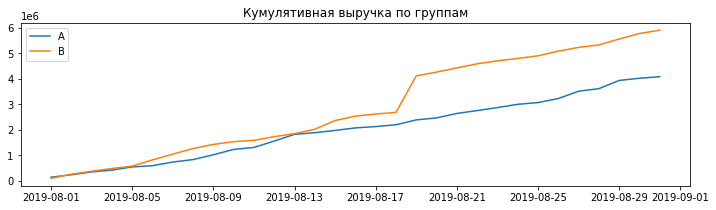

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,3))
# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=0)
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста.

График выручки по группе B показывает более высокие значения на протяжении всего тестового периода. Однако, в одной точке выручка резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

#### <a id='toc1_3_3_2_'></a>[График кумулятивного среднего чека по группам](#toc0_)

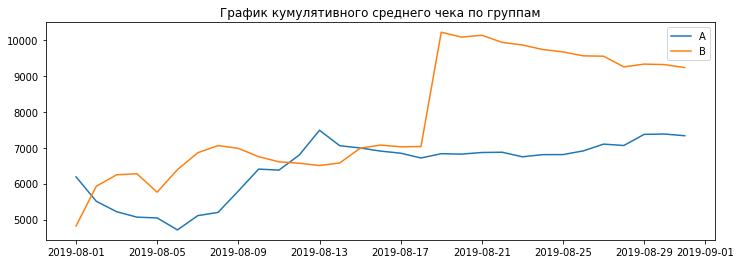

In [21]:
plt.figure(figsize=(12,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

Средний чек становится равномерным ближе к концу теста: установился для группы A и падает для группы B. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда необходимо больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

#### <a id='toc1_3_3_3_'></a>[График относительного изменения кумулятивного среднего чека группы B к группе A](#toc0_)

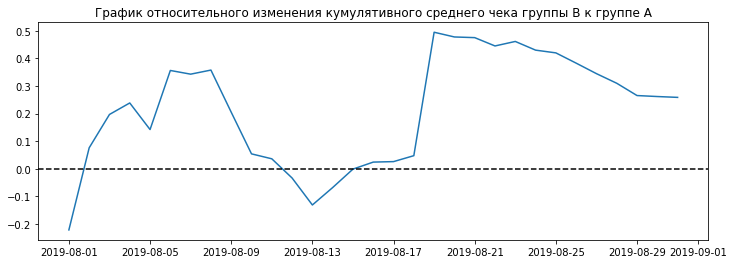

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,4))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

График различий сильно скачет. Необходимо проверить на выбросы (возможны большие заказы)

#### <a id='toc1_3_3_4_'></a>[График кумулятивного среднего количества заказов на посетителя по группам](#toc0_)

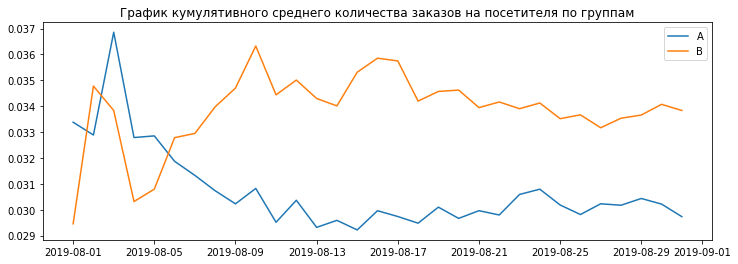

In [23]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();
#

Графики среднего числа заказов на посетителя относительно равномерные, у группы В показатель немного больше.

#### <a id='toc1_3_3_5_'></a>[График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#toc0_)

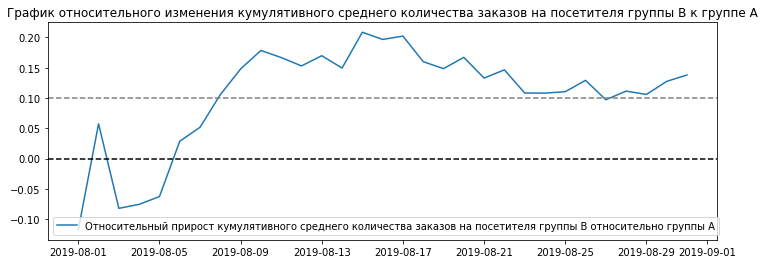

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--');


Показатели группы B значительно выше. Среднее количество заказов на посетителя для группы B немного уменьшалось, но теперь постепенно растёт

#### <a id='toc1_3_3_6_'></a>[Гочечный график количества заказов по пользователям](#toc0_)

In [25]:
ordersByUsers_clear = (
    df_orders_clear.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers_clear.columns = ['userId', 'orders']

print(ordersByUsers_clear.sort_values(by='orders', ascending=False).head())

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     


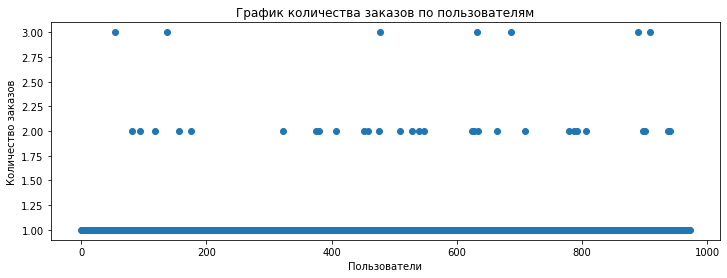

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers_clear)))

plt.figure(figsize=(12,4))
plt.scatter(x_values, ordersByUsers_clear['orders'])

plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show();

Большинство покупателей заказывали только один раз. Небольшая доля пользователей с 2-мя заказами.

#### <a id='toc1_3_3_7_'></a>[95-й и 99-й перцентили количества заказов на пользователя](#toc0_)
Выберем границу для определения аномальных пользователей.

In [27]:
print(np.percentile(ordersByUsers_clear['orders'], [95, 99]))

[1. 2.]


95% покупателей делали по одному заказу за исследуемый месяц. 99% - не более 2-х заказов.  Возьмем за границу 2 заказа на покупателя

#### <a id='toc1_3_3_8_'></a>[Точечный график стоимостей заказов](#toc0_)

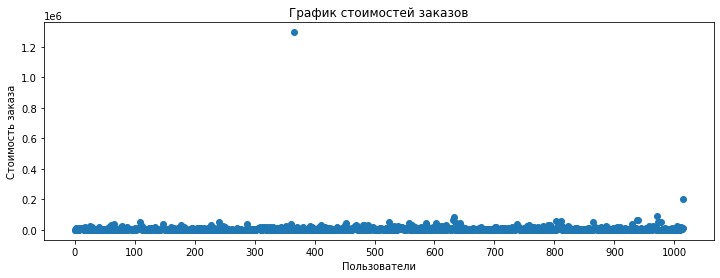

In [28]:
x_values = pd.Series(range(0,len(df_orders_clear['revenue'])))

plt.figure(figsize=(12,4))
plt.scatter(x_values, df_orders_clear['revenue'])
plt.xticks(np.arange(min(x_values), max(x_values), 100))

plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show();

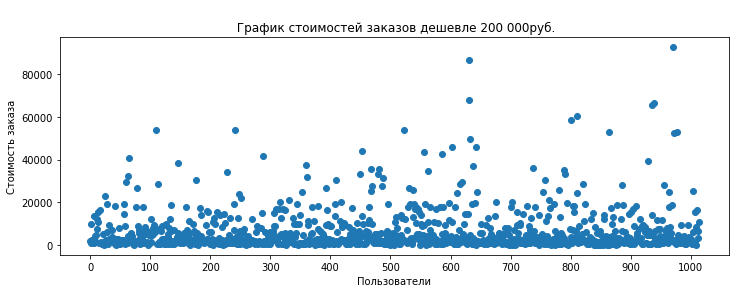

In [29]:
# График стоимости заказов по пользователям
# для заказов дешевле 200 000руб.
x_values = pd.Series(range(0, len(df_orders_clear[df_orders_clear['revenue'] < 200000])))
y_values = df_orders_clear[df_orders_clear['revenue'] < 200000]['revenue']

plt.figure(figsize=(12,4))
plt.scatter(x_values, y_values)

plt.xticks(np.arange(min(x_values), max(x_values), 100))
plt.title('\n График стоимостей заказов дешевле 200 000руб.')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()


В расчете выручки есть высокие аномальные значения, которые создавали скачок метрик.

#### <a id='toc1_3_3_9_'></a>[95-й и 99-й перцентили стоимости заказов](#toc0_)
Выберем границу для определения аномальных заказов.

In [30]:
print(np.percentile(df_orders_clear['revenue'], [95, 97.5, 99]))

[26785. 37400. 53904.]


 Установим границу отсечения на уровне 37 400руб.

#### <a id='toc1_3_3_10_'></a>[Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#toc0_)


In [31]:
# Подготовим и объединим данные
visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    df_orders[df_orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    df_orders[df_orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5).T)

,0,1,2,3,4
date,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00
ordersPerDateA,24,20,24,16,25
revenuePerDateA,148579,93822,112473,70825,124218
ordersPerDateB,21,24,16,17,23
revenuePerDateB,101217,165531,114248,108571,92428
ordersCummulativeA,24,44,68,84,109
revenueCummulativeA,148579,242401,354874,425699,549917
ordersCummulativeB,21,45,61,78,101
revenueCummulativeB,101217,266748,380996,489567,581995
visitorsPerDateA,719,619,507,717,756


Проведем тест по критерию Манна-Уитни. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Выдвинем гипотезы:
* **H``0``** —  Среднее количество заказов на одного пользователя не отличается статистически значимо между группами по "сырым" данным.

* **H``1``** — Среднее количество заказов на одного пользователя статистически значимо отличается между группами по "сырым" данным.

Уровень значимости альфа установим α=0.05

In [32]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
# Тем, кто ничего не заказал, будут соответствовать нули.

ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [33]:
# Проведем тест

p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
alfa = 0.05
print(f"p-value теста Манна-Уитни: {p_value:.3f}")
print(f"Уровень значимости: {alfa}")

if p_value < alfa:
    print("Отвергаем нулевую гипотезу: различие статистически значимо")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать различия статистически значимыми")

relative_difference = sampleB.mean() / sampleA.mean() - 1
print(f"Относительное изменение среднего значения выборки B по отношению к выборке A: {relative_difference * 100:.1f}%")

p-value теста Манна-Уитни: 0.017
Уровень значимости: 0.05
Отвергаем нулевую гипотезу: различие статистически значимо
Относительное изменение среднего значения выборки B по отношению к выборке A: 13.8%


Cуществует статистически значимое различие в среднем количестве заказов на посетителя между группами по "сырым" данным — значение p-value теста Манна-Уитни составило 0.017, что меньше обычного уровня значимости 0.05. Это позволяет нам отвергнуть нулевую гипотезу о том, что различия в среднем количестве заказов на посетителя между группами статистически не значимы.

Кроме того, cреднее количество заказов на посетителя в группе B на 13.8% выше, чем в группе A.

#### <a id='toc1_3_3_11_'></a>[Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#toc0_)

Проведем тест по критерию Манна-Уитни. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Выдвинем гипотезы:

* **H``0``** — Средний чек не отличается статистически значимо между группами по "сырым" данным.

* **H``1``** — Средний чек статистически значимо отличается между группами по "сырым" данным.

Уровень значимости альфа установим α=0.05

In [34]:
# Проведем тест

p_value = stats.mannwhitneyu(df_orders_clear[df_orders_clear['group']=='A']['revenue'], df_orders_clear[df_orders_clear['group']=='B']['revenue'])[1]
alfa = 0.05
print(f"p-value теста Манна-Уитни: {p_value:.3f}")
print(f"Уровень значимости: {alfa}")

if p_value < alfa:
    print("Отвергаем нулевую гипотезу: различие статистически значимо")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать различия статистически значимыми")

relative_difference = df_orders_clear[df_orders_clear['group']=='B']['revenue'].mean()/df_orders_clear[df_orders_clear['group']=='A']['revenue'].mean()-1
print(f"Относительное изменение среднего значения выборки B по отношению к выборке A: {relative_difference * 100:.1f}%")


p-value теста Манна-Уитни: 0.829
Уровень значимости: 0.05
Не получилось отвергнуть нулевую гипотезу, нет оснований считать различия статистически значимыми
Относительное изменение среднего значения выборки B по отношению к выборке A: 28.7%


Несмотря на заметное относительное различие, статистически значимых доказательств этого различия у нас нет.  

По "сырым" данным нет оснований утверждать, что различия в средних значениях выборок A и B статистически значимы.

#### <a id='toc1_3_3_12_'></a>[Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#toc0_)

Примем за аномальных пользователей тех, кто совершил больше 2-х заказов или сделал заказ дороже 37 400 руб..

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > 37400]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print('Аномальных пользователей:', abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
dtype: int64
Аномальных пользователей: 49


In [36]:
# Подготовим выборки количества заказов по пользователям по группам теста

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проведем тест по критерию Манна-Уитни. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по очищенным данным.

Выдвинем гипотезы:

* **H``0``** — Среднее количество заказов на одного пользователя не отличается статистически значимо между группами по очищенным данным.

* **H``1``** — Среднее количество заказов на одного пользователя статистически значимо отличается между группами по очищенным данным.

Уровень значимости альфа установим α=0.05

In [37]:
# Проведем тест

p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
alfa = 0.05
print(f"p-value теста Манна-Уитни: {p_value:.3f}")
print(f"Уровень значимости: {alfa}")

if p_value < alfa:
    print("Отвергаем нулевую гипотезу: различие статистически значимо")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать различия статистически значимыми")

relative_difference = sampleBFiltered.mean()/sampleAFiltered.mean()-1
print(f"Относительное изменение среднего значения выборки B по отношению к выборке A: {relative_difference * 100:.1f}%")


p-value теста Манна-Уитни: 0.009
Уровень значимости: 0.05
Отвергаем нулевую гипотезу: различие статистически значимо
Относительное изменение среднего значения выборки B по отношению к выборке A: 18.3%


Cуществует статистически значимое различие в среднем количестве заказов на посетителя между группами по очищенным данным — значение p-value теста Манна-Уитни составило 0.009, что меньше принятого уровня значимости 0.05. Это позволяет нам отвергнуть нулевую гипотезу о том, что различия в среднем количестве заказов на посетителя между группами статистически не значимы.

Среднее количество заказов на посетителя в группе B на 16.4% выше, чем в группе A.

#### <a id='toc1_3_3_13_'></a>[Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#toc0_)

Проведем тест по критерию Манна-Уитни. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным.

Выдвинем гипотезы:

* **H``0``** — Средний чек не отличается статистически значимо между группами по очищенным данным.

* **H``1``** — Средний чек статистически значимо отличается между группами по очищенным данным.

Уровень значимости альфа установим α=0.05

In [38]:
# Проведем тест

p_value = stats.mannwhitneyu(
            df_orders_clear[
                np.logical_and(
                    df_orders_clear['group'] == 'A',
                    np.logical_not(df_orders_clear['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            df_orders_clear[
                np.logical_and(
                    df_orders_clear['group'] == 'B',
                    np.logical_not(df_orders_clear['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

alfa = 0.05
print(f"p-value теста Манна-Уитни: {p_value:.3f}")
print(f"Уровень значимости: {alfa}")

if p_value < alfa:
    print("Отвергаем нулевую гипотезу: различие статистически значимо")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать различия статистически значимыми")

relative_difference = df_orders_clear[
            np.logical_and(
                df_orders_clear['group'] == 'B',
                np.logical_not(df_orders_clear['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() / df_orders_clear[
            np.logical_and(
                df_orders_clear['group'] == 'A',
                np.logical_not(df_orders_clear['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() - 1

print(f"Относительное изменение среднего значения выборки B по отношению к выборке A: {relative_difference * 100:.1f}%")

p-value теста Манна-Уитни: 0.942
Уровень значимости: 0.05
Не получилось отвергнуть нулевую гипотезу, нет оснований считать различия статистически значимыми
Относительное изменение среднего значения выборки B по отношению к выборке A: 2.2%


На основе проведенного теста Манна-Уитни, p-value составляет 0.942, что больше принятого уровня значимости 0.05. Мы не можем отвергнуть нулевую гипотезу о том, что средний чек не отличается статистически значимо между группами по очищенным данным.

Наблюдаемое различие в 2.2% не является статистически значимым, cредний чек в обеих группах считаем равным.

#### <a id='toc1_3_3_14_'></a>[Решение по результатам теста](#toc0_)

 1. В рамках A/B-тестирования посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по очищенным и "сырым" данным:

  * Аномальные значения имеют некоторое влияние на статистическую значимость, однако не влияют на результат. По очищенным данным значение p_value уменьшилось с 0.017 до 0.009.
  * Относительный прирост группы В к группе А увеличился с 13.8% до 16.4%

2. Посчитана статистическая значимость различий в среднем чеке заказа между группами по очищенным и "сырым" данным:

   *  Статистической разницы между очищенными и "сырыми" данными нет: значение p_value увеличилось с 0.829 до 0.942
  *  Относительный прирост группы В к группе А уменьшился с 28.7% до 2.2%.   

Имеющиеся факты:

* Есть статистически значимое различие по среднему количеству заказов между группами по "сырым" и по очищенным данным.
* Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по очищенным данным.
* График различия среднего количества заказов между группами показывает, что результаты группы B стабильно лучше группы А.  
<br/><br/>


---


### <a id='toc1_3_4_'></a>[Вывод](#toc0_)
По результатам исследования можно считать, что различия среднего количества заказов между группами имеют статистическую значимость. В группе B количество заказов увеличилось, при этом изменение среднего чека не подтверждается.



Тест следует признать успешным и остановить.
<br/><br/>


---

